<a href="https://colab.research.google.com/github/MinnieShih/Deep_Learning_assignment/blob/main/Assignment1_Predict_diabetes_using_Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Check if there is any missing value
missing_df = df.isnull().sum()
print(missing_df)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [5]:
# Check if there is outliers
display(df.describe())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


As we check each column, obviously, some numbers seem don't make sense
* Pregnancies: Is max value 17 times possible?
* Glucose: Can the min value be 0?

    The 2-hour plasma glucose level <140 mg/dL is considered normal

    The 2-hour plasma glucose level of 140-199 mg/dL indicates impaired glucose tolerance

    The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes

    Ref:https://www.ncbi.nlm.nih.gov/books/NBK532915/#:~:text=The%202%2Dhour%20plasma%20glucose,200%20mg%2FdL%20indicates%20diabetes

* BloodPressure: Can the min value be 0?
* SkinThickness: Can the min value be 0? Is max value 99 possible?
* Insulin: Can the min value be 0? Is max value 846 possible?
* BMI: Can the min value be 0? Is max value 67.1 possible?
* DiabetesPedigreeFunction
* Age
* Outcome

For those features with the min value 0, it does not make sense than the max values. So, I impute those value with median.

In [6]:
#check how many zero in total in each variable. Because zero value is obviously not making sense.
#Refering website:https://www.collaborat.com/pima-diabetes-data-discovery-predictive-model/
#Refering Chatgpt
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

print("The number of zeros of each feature")
for col in columns:
    print(f"{col}: {(df[col] == 0).sum()}")

The number of zeros of each feature
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0


In [7]:
#impute all the zero value.
#Refering Chatgpt
import numpy as np
impute_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in impute_columns:

    df[col] = df[col].replace(0, np.nan)
    feature_median = df[col].median()
    df[col] = df[col].fillna(feature_median)

In [8]:
print("After imputing, the number of zeros of each feature")
for col in columns:
    print(f"{col}: {(df[col] == 0).sum()}")

After imputing, the number of zeros of each feature
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [10]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8.0,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,4.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


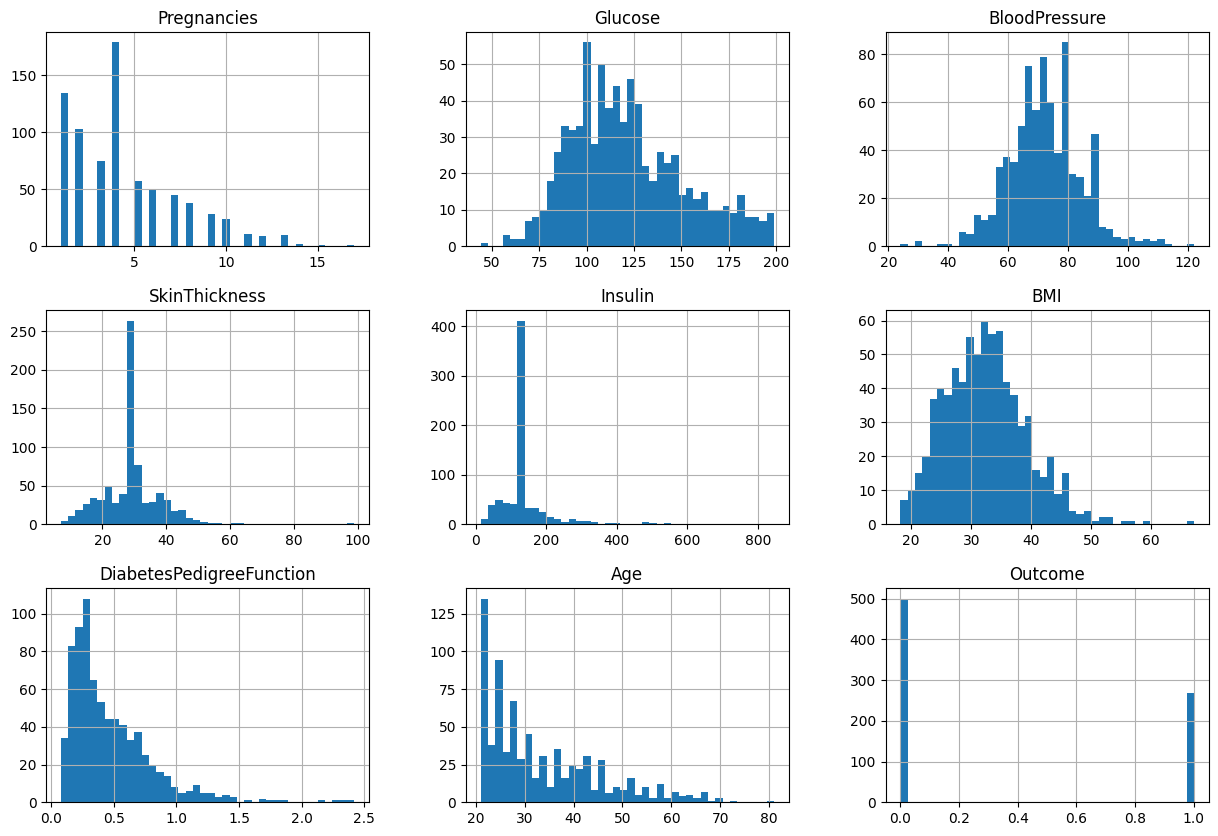

In [11]:
diagram = df.hist(bins=40, figsize=(15, 10))

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X = df[['DiabetesPedigreeFunction']]
scaled_df = scale.fit_transform(X)

In [12]:
import matplotlib.pyplot as plt
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

scaled_df.hist(bins=40, figsize=(15, 10))
plt.suptitle('Histograms of Scaled Features', fontsize=16)  # Add a title for all plots
plt.show()

NameError: name 'scaled_df' is not defined